___

<a href='https://www.udemy.com/user/joseportilla/'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Support Vector Machines 


## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

<img src="wine.jpg">

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**TASK: Our overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features.**

---
---

## Importing the necessary libraries

**TASK: Run the cells below to import the libraries and load the dataset.**

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("C:\\Users\\amans\\Music\\Machine Learning Udemy\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\wine_fraud.csv")

In [44]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


**Identifying the unique variables in the target column we are trying to predict (quality)**

In [45]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

**Creating a countplot that displays the count per category of Legit vs Fraud**

In [46]:
df['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Legit
1       Legit
2       Legit
3       Legit
4       Legit
        ...  
6492    Legit
6493    Legit
6494    Legit
6495    Legit
6496    Legit
Name: quality, Length: 6497, dtype: object>

<Axes: xlabel='quality', ylabel='count'>

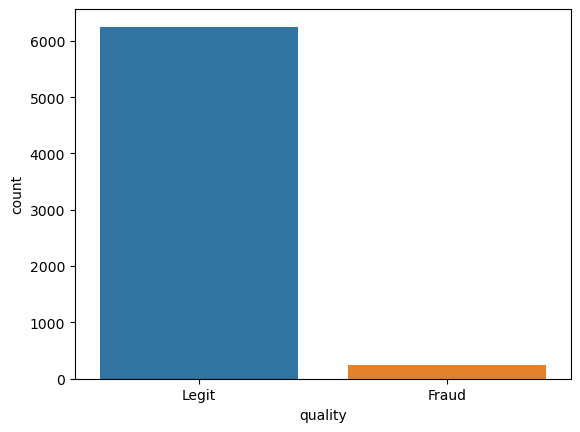

In [47]:
sns.countplot(x='quality',data=df)

<Axes: xlabel='type', ylabel='count'>

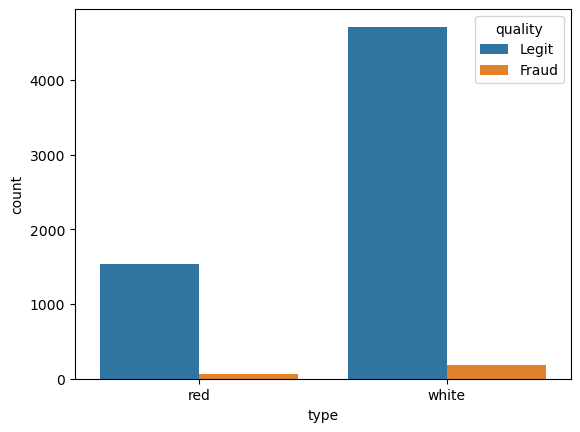

In [48]:
sns.countplot(hue='quality',data=df,x= 'type')

**percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [49]:
red = df[df['type']=='red']
white = df[df['type']=='white']

In [50]:
100*len(red[red['quality'] == 'Fraud'])/len(red)

3.9399624765478425

In [51]:
100*len(white[white['quality'] == 'Fraud'])/len(white)

3.736218864842793

**correlation between the various features and the "quality" column. **

In [52]:
df['Fraud'] = df['quality'].map({'Legit':0,'Fraud':1})

In [53]:
df.corr()['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

<Axes: >

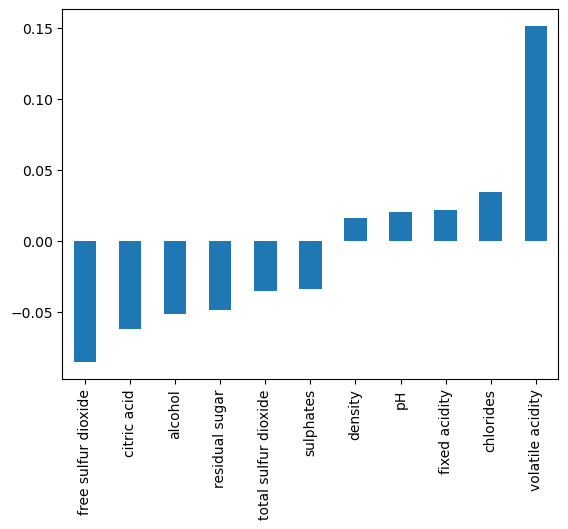

In [54]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar')

**bar plot of the correlation values to Fraudlent wine.**

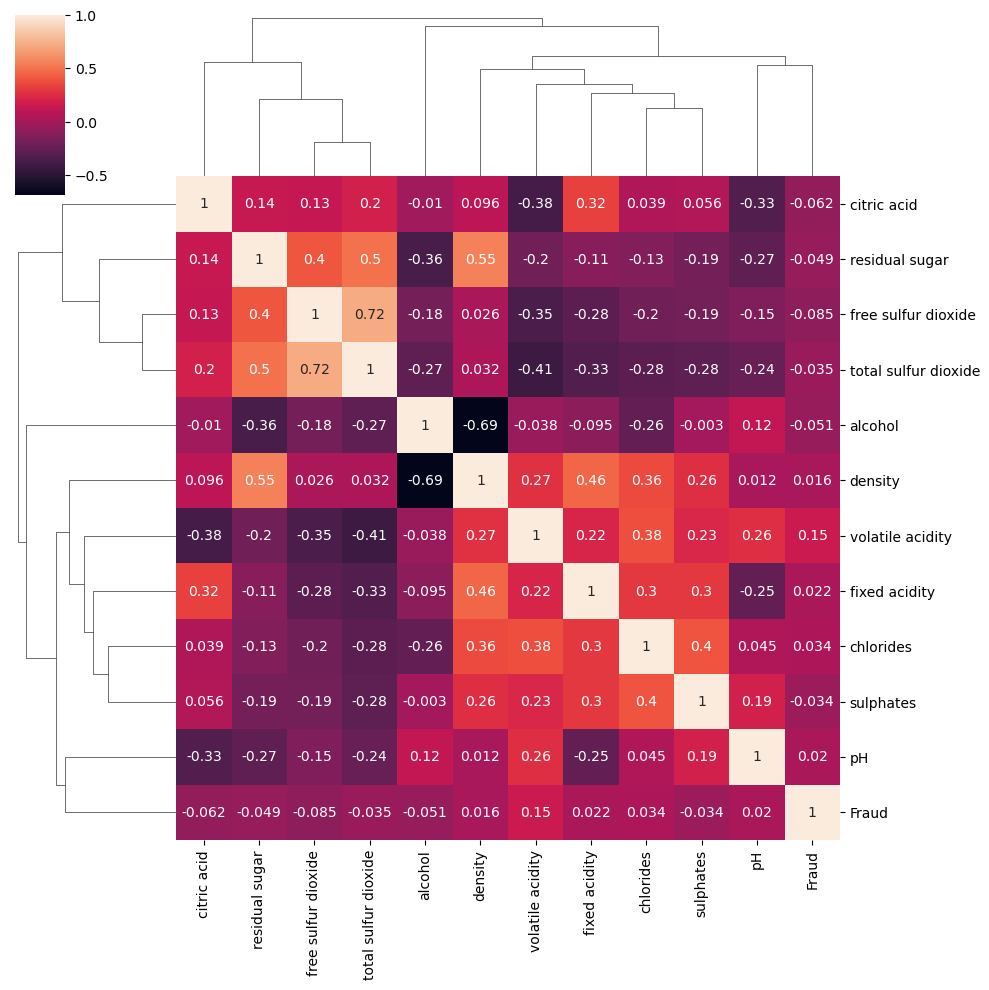

In [55]:
sns.clustermap(df.corr(),figsize=(10,10),annot = True)

----
## Machine Learning Model

**Converting the categorical column "type" from a string or "red" or "white" to dummy variables:**

In [56]:
df['type'] = pd.get_dummies(df['type'],drop_first= True)

**Separate out the data into X features and y target label ("quality" column)**

In [57]:
X = df.drop('quality',axis=1)

In [58]:
y= df['quality']

**Perform a Train|Test split on the data, with a 10% test size.**

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Scaling the X train and X test data.**

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

In [65]:
scaled_X_train = scaler.fit_transform(X_train)

In [66]:
scaled_X_test = scaler.transform(X_test)

In [67]:
from sklearn.svm import SVC

In [68]:
svc = SVC(class_weight='balanced')

**GridSearchCV to run a grid search for the best C and gamma parameters.**

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
             'gamma':['scale','auto']
             }

In [71]:
grid = GridSearchCV(svc,param_grid)

In [72]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [73]:
grid.best_params_

{'C': 0.001, 'gamma': 'scale', 'kernel': 'linear'}

**confusion matrix and classification report for your model.**

In [74]:
from sklearn.metrics import confusion_matrix,classification_report

In [75]:
grid_preds = grid.predict(scaled_X_test)

In [76]:
confusion_matrix(y_test,grid_preds)

array([[  64,    0],
       [   0, 1886]], dtype=int64)

In [77]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00        64
       Legit       1.00      1.00      1.00      1886

    accuracy                           1.00      1950
   macro avg       1.00      1.00      1.00      1950
weighted avg       1.00      1.00      1.00      1950



**Suggestions:**